In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Load data 

In [3]:
df = pd.read_csv(r"C:\Users\cex\Desktop\Data sets\50_Startups.csv")

Step 3: Exploring the data set

In [6]:
#involves displaying the dataset information 
df.info()  # Check structure of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.head()  # View first 5 rows

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
df.describe()  # Get summary statistics


,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
df.isnull().sum()  # Count missing values


R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [10]:
df.nunique()  # Count unique values per column

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

Handling categorical data

In [13]:
print(df.columns)


Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')


In [14]:
print(df.dtypes)


R&D Spend          float64
Administration     float64
Marketing Spend    float64
Profit             float64
State_Florida         bool
State_New York        bool
dtype: object


In [15]:
print(df.head())  # Check if `State` exists in the dataset


   R&D Spend  Administration  Marketing Spend     Profit  State_Florida  \
0  165349.20       136897.80        471784.10  192261.83          False   
1  162597.70       151377.59        443898.53  191792.06          False   
2  153441.51       101145.55        407934.54  191050.39           True   
3  144372.41       118671.85        383199.62  182901.99          False   
4  142107.34        91391.77        366168.42  166187.94           True   

   State_New York  
0            True  
1           False  
2           False  
3            True  
4           False  


In [16]:
if 'State' in df.columns:
    df = pd.get_dummies(df, columns=['State'], drop_first=True)
else:
    print("Column 'State' is missing from the DataFrame.")

Column 'State' is missing from the DataFrame.


In [17]:
print(df.head())  # Displays the first few rows
print(df.columns)  # Lists all column names


   R&D Spend  Administration  Marketing Spend     Profit  State_Florida  \
0  165349.20       136897.80        471784.10  192261.83          False   
1  162597.70       151377.59        443898.53  191792.06          False   
2  153441.51       101145.55        407934.54  191050.39           True   
3  144372.41       118671.85        383199.62  182901.99          False   
4  142107.34        91391.77        366168.42  166187.94           True   

   State_New York  
0            True  
1           False  
2           False  
3            True  
4           False  
Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')


In [18]:
print(df[['State_Florida', 'State_New York']].head())


   State_Florida  State_New York
0          False            True
1          False           False
2           True           False
3          False            True
4           True           False


**Simple Linear Regression**
***Objective: Predict Profit using a single independent variable (R&D Spend)***

In [27]:
#objective is predicting profit using a single independent variable (R&D Spend)
X = df[['R&D Spend']]  
Y = df['Profit']

Split Data into Training and testing sets 

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Train the Model

In [29]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

Making the prediction 

In [30]:
y_pred = model.predict(X_test)

Evaluate the model 

In [31]:
mae = mean_absolute_error(y_test, y_pred)  
mse = mean_squared_error(y_test, y_pred)  
rmse = np.sqrt(mse)  
r2 = r2_score(y_test, y_pred)  

print(f"MAE: {mae:.2f}")  
print(f"MSE: {mse:.2f}")  
print(f"RMSE: {rmse:.2f}")  
print(f"R2 Score: {r2:.2f}")

MAE: 6077.36
MSE: 59510962.81
RMSE: 7714.33
R2 Score: 0.93


Visualize the regression line

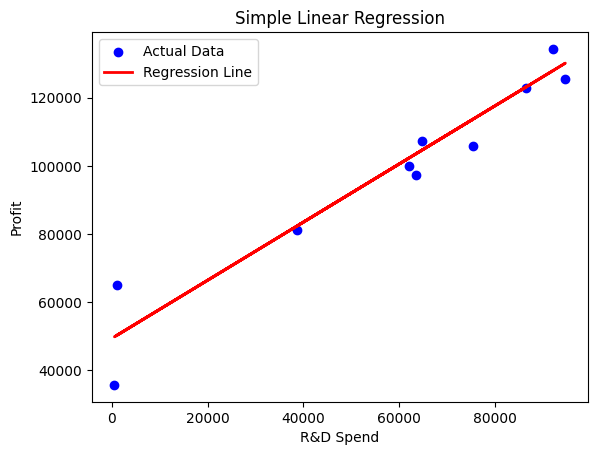

In [32]:
plt.scatter(X_test, y_test, color='blue', label='Actual Data')  
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')  
plt.xlabel("R&D Spend")  
plt.ylabel("Profit")  
plt.title("Simple Linear Regression")  
plt.legend()  
plt.show()

📌 Final Interpretation  

- **Strong Model Fit (R² = 0.93)**:  
  The high R² score of **0.93** suggests that **93% of the variance in Profit** is explained by **R&D Spend**, making it a strong predictor. However, R² alone doesn't guarantee a perfect model—it only measures the model's fit to the training data.  

- **Prediction Accuracy (RMSE = 7714.33)**:  
  The relatively low **Root Mean Squared Error (RMSE) of 7,714** indicates that the average prediction error is around **$7,714**, which is small compared to the overall range of **Profit values** in the dataset. A lower RMSE means the model's predictions are fairly accurate.  

- **Visual Confirmation of a Linear Relationship**:  
  The **regression line (red)** closely follows the trend of the **actual data points (blue)**, confirming a **strong linear relationship** between **R&D Spend** and **Profit**. This supports the assumption that a **linear model** is appropriate for predicting profit.  

---
**Conclusion**:  
The model performs well in predicting profit based on R&D spend, showing a strong linear relationship and reasonable error margin. However, further analysis (e.g., checking for outliers, considering additional factors) may improve the model.  


**Multiple Linear Regression**
****Objective: Predict Profit using multiple independent variables (R&D Spend, Administration, Marketing Spend, State)****.

*Step 1: Select Features and Target Variable*

In [33]:
# Multiple Linear Regression (Using R&D Spend, Administration, and Marketing Spend)
X_multi = df[['R&D Spend', 'Administration', 'Marketing Spend','State_Florida']]
y_multi = df['Profit']

*Step 2: Train and Evaluate the model*

In [39]:

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Initializing a Linear Regression model
model_multi = LinearRegression()

# Training the model using the training dataset
model_multi.fit(X_train_m, y_train_m)

# Making predictions on the test dataset
y_pred_multi = model_multi.predict(X_test_m)

# Calculating evaluation metrics
mae_multi = mean_absolute_error(y_test_m, y_pred_multi)  # Mean Absolute Error
mse_multi = mean_squared_error(y_test_m, y_pred_multi)  # Mean Squared Error
rmse_multi = np.sqrt(mse_multi)  # Root Mean Squared Error
r2_multi = r2_score(y_test_m, y_pred_multi)  # R-squared score (coefficient of determination)
# Display evaluation metrics
print(f"Mean Absolute Error (MAE): {mae_multi:.2f}")
print(f"Mean Squared Error (MSE): {mse_multi:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_multi:.2f}")
print(f"R² Score: {r2_multi:.2f}")


Mean Absolute Error (MAE): 6961.49
Mean Squared Error (MSE): 82010370.81
Root Mean Squared Error (RMSE): 9055.96
R² Score: 0.90


Interpretation:

R² Score (0.90):

The model explains 90% of the variance in Profit using R&D Spend, Administration, Marketing Spend, and State (Florida).
This is a strong indication that these independent variables collectively have a significant impact on predicting Profit.
However, a high R² doesn’t guarantee a perfect model.

RMSE (9055.96) & MAE (6961.49):

MAE means that, on average, the predictions are off by $6,961.
RMSE (square root of MSE) is $9,055.96, meaning that while the model performs well, there may be some larger errors or outliers influencing the predictions.

MSE (82,010,370.81):

Since MSE is in squared units, it’s harder to interpret directly.
A lower MSE is better, but RMSE is a more useful metric since it's in the same unit as Profit.

**Polynomial Regression**
Objective: Model a non-linear relationship between R&D Spend and Profit

Transform Data for Polynomial Regression

In [42]:
# Polynomial Regression (Model a non-linear relationship with R&D Spend)
degree = 2
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(df[['R&D Spend']])

Train and Evaluate the Model

In [43]:
model_poly = LinearRegression()
model_poly.fit(X_poly, y)
y_pred_poly = model_poly.predict(X_poly)

Visualize the Curve

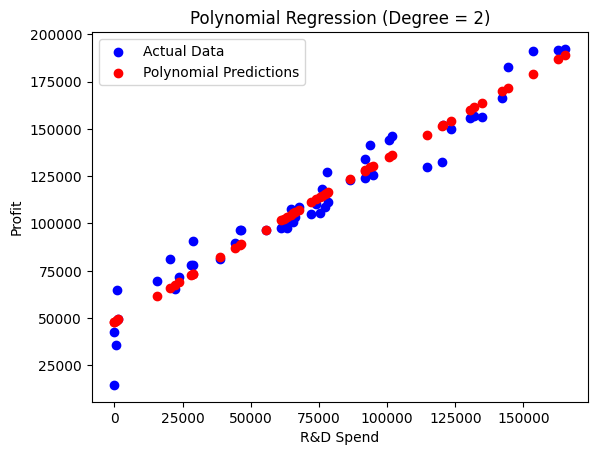

In [44]:
plt.scatter(df['R&D Spend'], y, color='blue', label='Actual Data')  
plt.scatter(df['R&D Spend'], y_pred_poly, color='red', label='Polynomial Predictions')  
plt.xlabel("R&D Spend")  
plt.ylabel("Profit")  
plt.title("Polynomial Regression (Degree = 2)")  
plt.legend()  
plt.show()

Interpretation

The Polynomial Regression model (degree = 2) provides a better fit than Simple Linear Regression by capturing the non-linear relationship between R&D Spend and Profit, as seen in the close alignment between the red (predicted) and blue (actual) points. While minor deviations exist, the model effectively follows the data trend, suggesting improved accuracy